### Sometimes you may need to visualize the runtime of a program just because you are curious or you want to set a limit on how long it takes. 

Below is a Leetcode problem, "Daily Temperature", that I used to test this program. Also, I included a description of the problem. Link to the problem https://leetcode.com/problems/daily-temperatures/

Given an array of integers, `temperatures` represents the daily temperatures, return an array `answer` such that `answer[i]` is the number of days you have to wait after the `ith` day to get a warmer temperature. If there is no future day for which this is possible, keep `answer[i] == 0` instead.

The testcases I provided were in varying sizes, and I solved the problem using brute force and an optimized approach. 

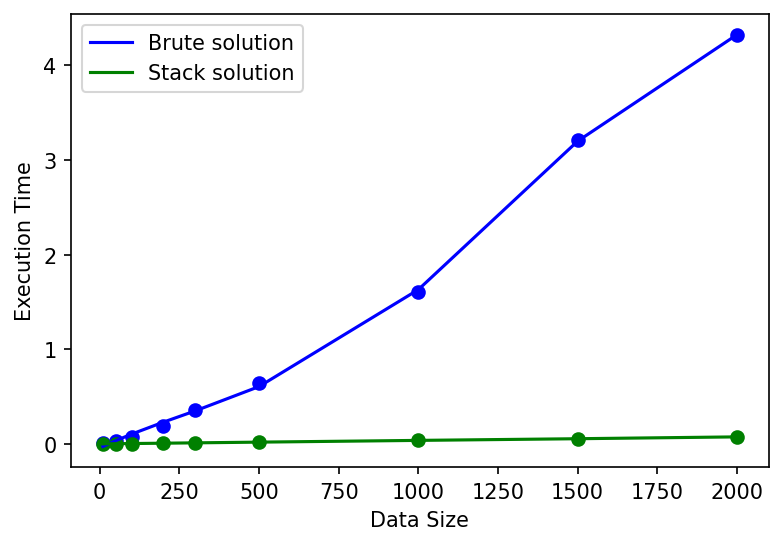

In [12]:
from random import randint
import numpy as np
import timeit
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

values = [10, 50, 100, 200, 300, 500, 1000, 1500, 2000]
temperatures = []
for val in values:
    temp = []
    for _ in range(val):
        rand_num = randint(10, 99)
        temp.append(rand_num)
    temperatures.append(temp)


def daily_temperature_brute(temperatures):
    wait_days = [0] * len(temperatures)
    for i in range(len(temperatures)):
        j = i + 1
        while j < len(temperatures) and temperatures[j] <= temperatures[i]:
            j += 1
        if j < len(temperatures):
            wait_days[i] = j - i
    return wait_days


def daily_temperature_stack(temperatures):
    stack = []
    days_to_wait = [0] * len(temperatures)
    for i in range(len(temperatures)):
        while stack and temperatures[i] > temperatures[stack[-1]]:
            current_temp = stack.pop()
            days_to_wait[current_temp] = i - current_temp
        stack.append(i)
    return days_to_wait


ts = [timeit.timeit('daily_temperature_brute(lst)',
                    setup=f'lst={temp}',
                    globals=globals(),
                    number=1000)
      for temp in temperatures]

tt = [timeit.timeit('daily_temperature_stack(lst)',
                    setup=f'lst={temp}',
                    globals=globals(),
                    number=100)
      for temp in temperatures]

figure(figsize=(6, 4), dpi=150)

plt.plot(values, ts, 'bo')
plt.plot(values, tt, 'go')

degree = 4
coeffs1 = np.polyfit(values, ts, degree)
coeffs2 = np.polyfit(values, tt, degree)
brute = np.poly1d(coeffs1)
optimized = np.poly1d(coeffs2)
plt.plot(values, [brute(n) for n in values], '-b', label="Brute solution")
plt.plot(values, [optimized(n) for n in values], '-g', label="Stack solution")
plt.xlabel("Data Size")
plt.ylabel("Execution Time")
plt.legend(loc="upper left")
plt.show()